# Advanced Machine Learning Techniques for Predicting Nha Trang Shorelines

*SARIMA, NNAR và LSTM là những mô hình hiệu quả hơn EOF trong việc dự đoán sự thay đổi đường bờ biển Nha Trang dựa trên hình ảnh camera giám sát, đặc biệt khi kết hợp với các kỹ thuật xử lý dữ liệu thiếu: seasonal adjusted
linear interpolation*

# Data collection

* Mỗi ảnh được chụp từng giây từ **6h sáng - 5h15 chiều** của từng ngày

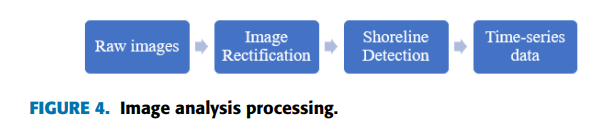

* **Step 1: Generate ảnh trung bình 15 phút**  
 *12 ground control points được chọn để giảm thiểu sự thay đổi mực nước biển, chọn dọc theo đê biển với độ cao như nhau, qua đó ảnh xiên được chuyển thành ảnh ngang*

? Tại sao lại chọn 15 phút

* **Step 2: Detect shoreline coordinates:**
    * Là boundary giữa wet sand và dry sand
    * Sử dụng max gradient để xác định vị trí đường bờ
    * Do chúng không xét theo chiều cao mực nước biển nên được hiệu chỉnh theo phương trình:

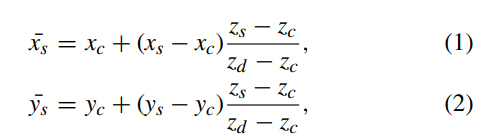

trong đó:
* $(x_s,y_s,z_s)$ là điểm phát hiện shoreline
* $(\bar{x_s},\bar{y_s},\bar{z_s})$ là điểm phát hiện shoreline đã điều chỉnh
* $(x_c,y_c,z_c)$ là điểm camera
* $z_d$ độ cao của đê
* $z_s$ mực nước biển

* $\bar{z} = z_s$

$z_s$ vừa là sea level, vừa là độ cao phát hiện shore line????

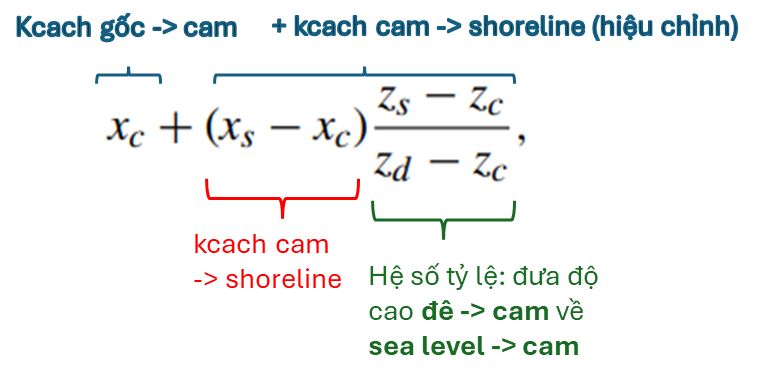

👉 Công thức này đưa tọa độ từ **hệ quy chiếu đê** sang **hệ quy chiếu sea level**

* **Sau đó kiểm định** bằng ảnh trên Google Earth

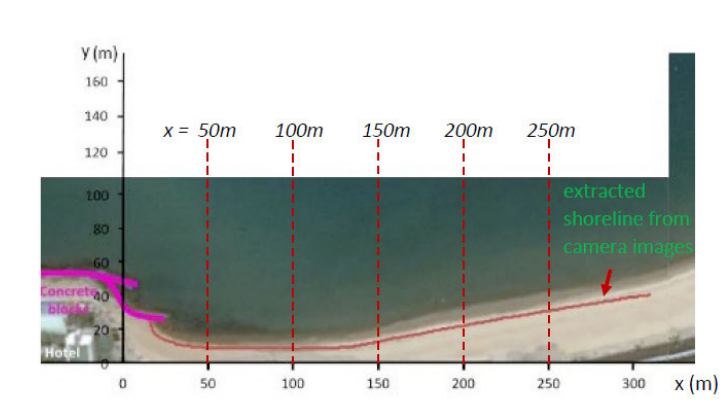

* Theo dõi position tại 5 điểm đại diện, được chuỗi thời gian :  
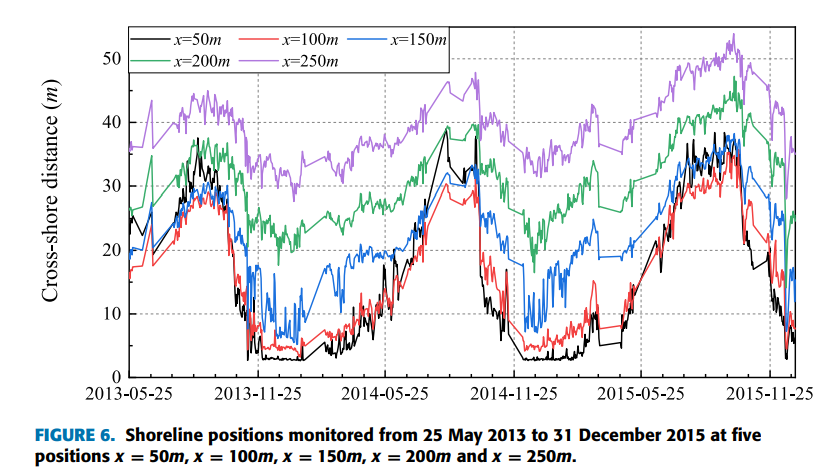

# Data exploration

>👉 non-stationary

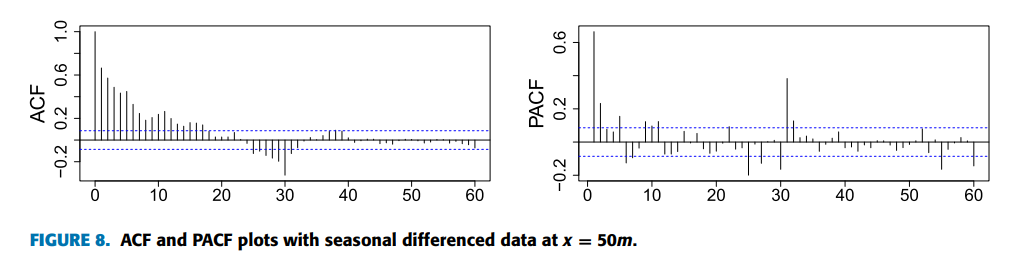

# Data preprocessing

vấn đề nặng nhất là missing data, nhóm sử dụng 3 phương pháp fill:

* Zero imputation

* LOCF, Linear interpolation:
    * Decompose:  $Y_t = T_t + S_t + n_t$
    * **Fill với data non-seasonal, sau đó add lại thành phần seasonal**

* KNN

# Forecasting strategies

## Single-step

$$f[x_t, x_{t-1}, ..., x_0] = y_{t+1}$$  
$$f[x_{t+1}, x_{t}, ..., x_1] = y_{t+2}$$  
$$...$$  
$$f[x_{t+m-1}, x_{t+m-2}, ..., x_{m-1}] = y_{t+m}$$

## Multi-step

$$f[x_t, x_{t-1}, ..., x_0] = y_{t+1}$$  
$$f[y_{t+1}, x_{t}, ..., x_1] = y_{t+2}$$  
$$f[y_{t+2}, y_{t+1}, ..., x_2] = y_{t+3}$$  
$$...$$  
$$f[y_{t+m-1}, y_{t+m-2}, ..., y_{m-1}] = y_{t+m}$$

> 👉 Multi-step sẽ sai số nhiều hơn do lỗi tích lũy

❓❓❓ Để giảm lỗi tích lũy cho multi-step prediction, họ sử dụng:

* **Step 1:** Đặt một số step là K (chưa rõ chọn K thế nào)
* **Step 2:** Áp dụng multi-step cho K bước thời gian dự đoán đầu  
    👉 predicted_values = $[y_{t+1}, y_{t+2}, y_{t+3}, ..., y_{t+K}]$

* **Step 3:** sử dụng single-step nhưng không cố định độ dài window  
    

$$f[x_t, x_{t-1}, ..., x_0] = y_{t+K+1}$$  
$$f[x_{t+1}, x_{t}, ..., x_0] = y_{t+K+2}$$  
$$...$$  
$$f[x_{t+m-1}, x_{t+m-2}, ..., x_0] = y_{t+m}$$

# Forecasting models

* EOF
* SARIMA
* NNAR, LSTM  

>👉 Best model = minimum MAPE

## EOF

* Sự biến thiên shoreline được tính bằng:

$$ y(x,t) = y_m(x,t) - \bar y(x) $$

* Shoreline position data is decomposed into 2 dimensions:
    * $e(x)$: Hàm riêng không gian (các vecto riêng của $X_{input}$)
    * $c(t)$: Hàm riêng thời gian (các thành phần chính khi chiếu $X_{input}$ lên các vecto riêng)

* EOF analysis is displayed as:  
$$ y(x,t) = \sum^\infty_{i=1} e_i(x)c_i(t)$$

* Giựa vào data, họ tính được contribution của **thành phần chính** đầu tiên chiếm 95.2%, nên họ sử dụng thành phần chisnhd dầu tiên

* Sử dụng tpc đầu tiên để dự đoán:

$$ y_m(x,t) = \bar{y}(x) + e_1(x)c_1(t) $$

## Sarima

🔄GridSearch và chọn min MAPE:
* p,q, P và Q = [1,2,3,4,5]
* d và D = [1,2]
* s = 30

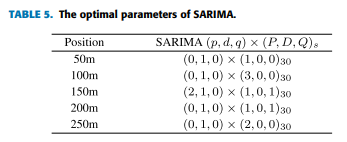

## NNAR

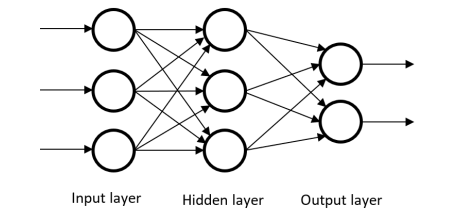

NNAR $(p, P, k)_s$

* p: số lag input
* k: số node ở hidden layer
* P: số lag trong thành phần thời vụ
* s: seasonal

🔄GridSearch và chọn min MAPE:
* p,P = [1,2,...,20]
* k = [1,..,5]
* s = 30

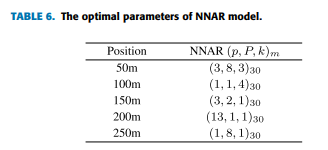

## LSTM

🔄 Find best LSTM:
* hidden neurons = [1,...,400]
* time step = [1, ..., 20]
* batch size = [2, ..., 64]
* 100 epochs with Early Stopping

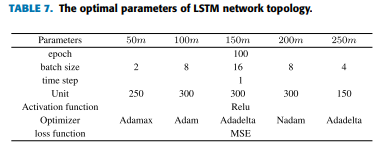

# Result

## Imputation

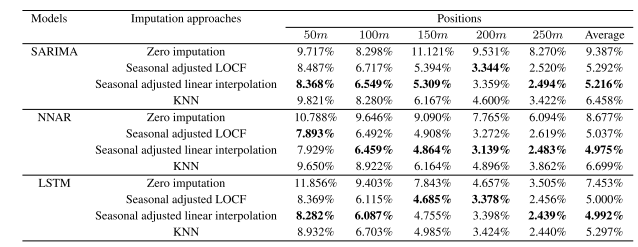

> 👉 Best imputation: interpolation

## Single-step

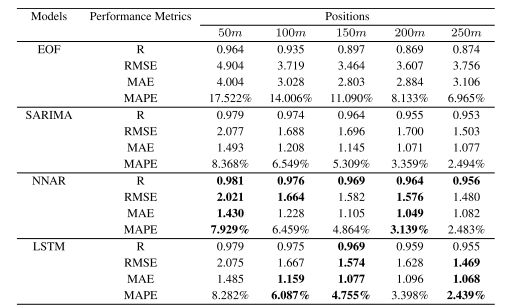

## Multi-step

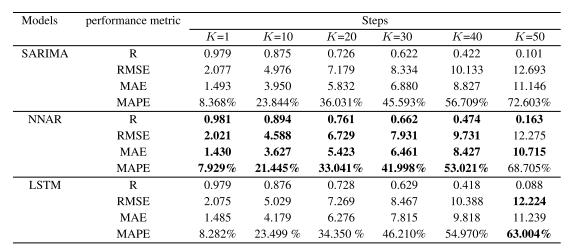